## Acrobot

In [1]:
using TrajectoryOptimization
using Plots, LinearAlgebra, MeshCat, MeshCatMechanisms, RigidBodyDynamics, GeometryTypes, CoordinateTransformations

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/c443b012d0ad3ce8e6cc9de306cd3766b1d18a79-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/c443b012d0ad3ce8e6cc9de306cd3766b1d18a79-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

Get path to urdf file

In [2]:
traj_folder = joinpath(dirname(pathof(TrajectoryOptimization)),"..")
urdf_folder = joinpath(traj_folder, "dynamics/urdf")
urdf = joinpath(urdf_folder, "doublependulum.urdf");

Create underactuated model from urdf

In [3]:
model = Model(urdf,[0.;1.]); #specify which joints are actuated
model_d = rk3(model) # discrete dynamics
n = model.n
m = model.m;

Define numerical type

In [4]:
T = Float64;

Define initial and goal states

In [5]:
x0 = [0.0;0.0;0.0;0.0]
xf = [π;0.0;0.0;0.0];

Define a cost function

In [6]:
Qf = 1000.0*Diagonal(I,n)
Q = (1e-3)*Diagonal(I,n)
R = (1e-3)*Diagonal(I,m)

1×1 Diagonal{Float64,Array{Float64,1}}:
 0.001

Create terminal constraints

In [7]:
goal = goal_constraint(xf);

Create problem

In [8]:
N = 251

U = [ones(m) for k = 1:N-1]

dt = 0.01

obj = LQRObjective(Q,R,Qf,xf,N)
con = Constraints(N)
con[N] += goal

prob = Problem(model_d,obj,constraints=con,x0=x0,N=N,dt=dt,xf=xf)
initial_controls!(prob, U);

Solver options

In [9]:
opts_ilqr = iLQRSolverOptions(verbose=true, 
    cost_tolerance=1.0e-6)

opts_al = AugmentedLagrangianSolverOptions{T}(verbose=false,
    opts_uncon=opts_ilqr,
    iterations=30,
    penalty_scaling=10.0, 
    cost_tolerance=1.0e-6,
    cost_tolerance_intermediate=1.0e-5,
    constraint_tolerance=1.0e-4)

opts_altro = ALTROSolverOptions{T}(verbose=false,
    opts_al=opts_al);

Solve problem

In [10]:
solve!(prob, opts_altro); # solve with ALTRO

┌ Info: Augmented Lagrangian solve...
└ @ TrajectoryOptimization /home/taylor/.julia/dev/TrajectoryOptimization/src/altro.jl:24
    iter cost          expected    z         α         ρ         dJ        grad      zero_count info                                              
____----------------------------------------------------------------------------------------------------------------------------------------------
    1     4458.9547984  1343.88169  0.95057   0.125     0e+00     1277.453  147.7804 0          
    2     3416.5689319  1044.76911  0.997719  0.125     0e+00     1042.386  139.5045 0          
    3     1762.6147571  1494.5941   1.106624  0.25      0e+00     1653.954  84.4882  0          
    4     990.04133033  770.938828  1.00212   0.25      0e+00     772.5734  16.95102 0          
    5     568.01202379  432.96086   0.974752  0.25      0e+00     422.0293  15.94434 0          
    6     331.34057368  248.390092  0.952822  0.25      0e+00     236.6715  19.17342 0       

Plot state trajectory

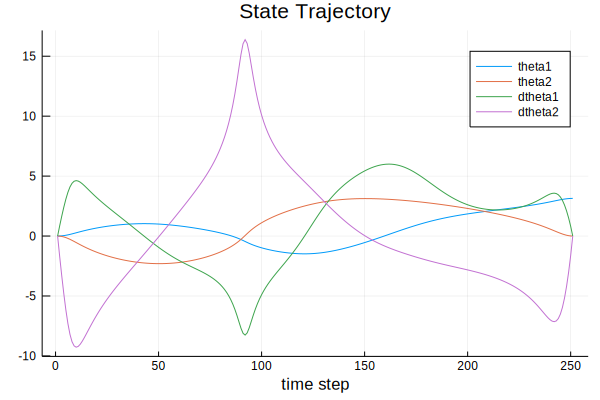

In [11]:
plot(prob.X,xlabel="time step",title="State Trajectory",label=["theta1" "theta2" "dtheta1" "dtheta2"])

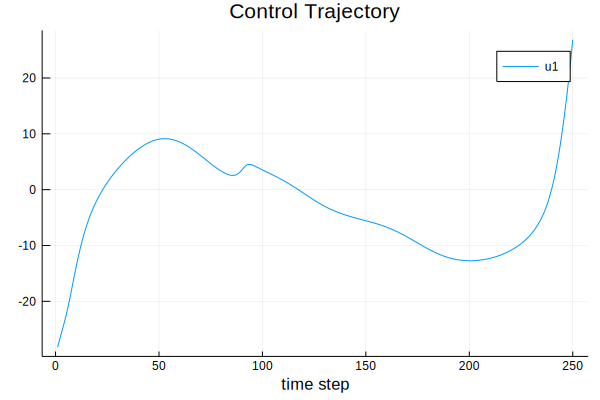

In [12]:
plot(prob.U,xlabel="time step",title="Control Trajectory",label=["u1" "u2"])

Visualizer

In [13]:
vis = Visualizer()
# open(vis)
IJuliaCell(vis)

WebIO.Scope("scope-6a1dcb22-da0f-4b4b-8681-b6712dfcd3df", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :iframe), Any[], Dict{Symbol,Any}(:attributes=>Dict{String,Any}("height"=>"100%","scrolling"=>"no","src"=>"javascript:void(0)","frameborder"=>0),:id=>"ifr",:style=>Dict("width"=>"100%","flexGrow"=>"1")), 0)], Dict{Symbol,Any}(:style=>Dict("flexDirection"=>"column","height"=>"100%","minHeight"=>"400px","display"=>"flex","width"=>"100%","overflow"=>"hidden")), 1), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}(), Set(String[]), nothing, Any[], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function () {\n    var frame = this.dom.querySelector(\"#ifr\");\n    var doc = frame.contentDocument\n    var win = frame.contentWindow\n\n    // Ensure that the iframe's baseURI matches the baseURI of the\n    // outer document. This is necessary to resolve\n    // https://github.com/JuliaGizmos/WebIO.jl/issues/167\n    var base = doc.createElement(\"base\");\n    base.setAttribute(\"href\", document.baseURI);\n    doc.head.appendChild(base);\n\n    var webio = doc.createElement(\"script\")\n    webio.src = \"/assetserver/c443b012d0ad3ce8e6cc9de306cd3766b1d18a79-assets/webio/dist/bundle.js\"\n    var parent = window\n\n    function resizeIframe() {\n        doc.body.style.padding = '0'\n        doc.body.style.margin = '0'\n        doc.documentElement.height = '100%'\n        doc.body.height = '100%'\n    }\n\n    webio.onload = function () {\n        win.WebIO.sendCallback = parent.WebIO.sendCallback; // Share stuff\n        win.WebIO.scopes = parent.WebIO.scopes\n        win.WebIO.obsscopes = parent.WebIO.obsscopes\n        win.WebIO._connected = true\n        doc.body.innerHTML = \"<html><body>\" + \"<div class='display:none'></div><unsafe-script style='display:none'>\\nWebIO.mount(this.previousSibling,{&quot;props&quot;:{},&quot;nodeType&quot;:&quot;Scope&quot;,&quot;type&quot;:&quot;node&quot;,&quot;instanceArgs&quot;:{&quot;imports&quot;:{&quot;data&quot;:[{&quot;name&quot;:null,&quot;type&quot;:&quot;js&quot;,&quot;url&quot;:&quot;/assetserver/487683c7b8bd883c883fabebf1cb3fede18f15f7-main.min.js&quot;}],&quot;type&quot;:&quot;async_block&quot;},&quot;id&quot;:&quot;scope-9cc4ad18-f600-4fd6-8e09-a2c3875d8841&quot;,&quot;handlers&quot;:{&quot;meshcat-command&quot;:[(function (val){return this.viewer.handle_command_message({&quot;data&quot;:val})})],&quot;_promises&quot;:{&quot;importsLoaded&quot;:[(function (mc){var element=this.dom.children[0]; this.viewer=new mc.Viewer(element); WebIO.setval({&quot;name&quot;:&quot;meshcat-request&quot;,&quot;scope&quot;:&quot;scope-9cc4ad18-f600-4fd6-8e09-a2c3875d8841&quot;,&quot;id&quot;:&quot;ob_02&quot;,&quot;type&quot;:&quot;observable&quot;},String(Date.now())); window.document.body.style.margin=&quot;0&quot;; return window.meshcat_viewer=this.viewer})]}},&quot;systemjs_options&quot;:null,&quot;observables&quot;:{&quot;meshcat-command&quot;:{&quot;sync&quot;:false,&quot;id&quot;:&quot;ob_01&quot;,&quot;value&quot;:[]},&quot;meshcat-controls&quot;:{&quot;sync&quot;:true,&quot;id&quot;:&quot;ob_03&quot;,&quot;value&quot;:[]},&quot;meshcat-request&quot;:{&quot;sync&quot;:true,&quot;id&quot;:&quot;ob_02&quot;,&quot;value&quot;:&quot;&quot;}}},&quot;children&quot;:[{&quot;props&quot;:{&quot;className&quot;:&quot;meshcat-viewer&quot;,&quot;style&quot;:{&quot;left&quot;:0,&quot;right&quot;:0,&quot;overflow&quot;:&quot;hidden&quot;,&quot;position&quot;:&quot;absolute&quot;,&quot;height&quot;:&quot;100vh&quot;,&quot;margin&quot;:0,&quot;width&quot;:&quot;100vw&quot;}},&quot;nodeType&quot;:&quot;DOM&quot;,&quot;type&quot;:&quot;node&quot;,&quot;instanceArgs&quot;:{&quot;namespace&quot;:&quot;html&quot;,&quot;tag&quot;:&quot;div&quot;},&quot;children&quot;:[]}]})</unsafe-script>\" + \"</body></html>\";\n        setTimeout(function () { resizeIframe() }, 0)\n    }\n\n    doc.body.appendChild(webio)\n}"), JSString("(function (){retur

Create mechanism

In [14]:
robot = RigidBodyDynamics.parse_urdf(T, urdf)
mvis = MechanismVisualizer(robot, URDFVisuals(urdf), vis);

In [15]:
# Set camera location
settransform!(vis["/Cameras/default"], compose(Translation(0.,1.0,1.0),LinearMap(RotZ(pi/2))));

Create generalized coordinate trajectory and animate

In [16]:
q = [[prob.X[k][1];prob.X[k][2]] for k = 1:N]
t = range(0,stop=N*dt,length=N)

setanimation!(mvis,t,q)